In [118]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Text(0, 0.5, 'PetalWidthCm')

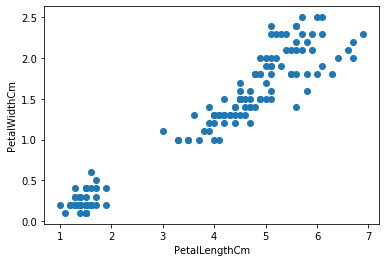

In [120]:
plt.scatter(df.PetalLengthCm,df.PetalWidthCm)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

In [121]:
km = KMeans(n_clusters=3)
predicted = km.fit_predict(df[["PetalLengthCm","PetalWidthCm"]])
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
df["clusters"] = predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


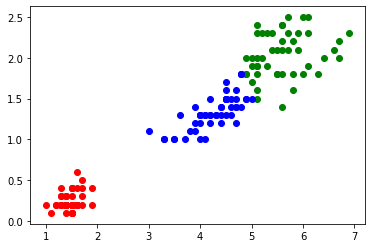

In [123]:
plt.scatter(df[df.clusters ==0].PetalLengthCm,df[df.clusters ==0].PetalWidthCm,color = "red")
plt.scatter(df[df.clusters ==1].PetalLengthCm,df[df.clusters ==1].PetalWidthCm,color = "green")
plt.scatter(df[df.clusters ==2].PetalLengthCm,df[df.clusters ==2].PetalWidthCm,color = "blue")

Text(0.5, 1.0, 'Actual')

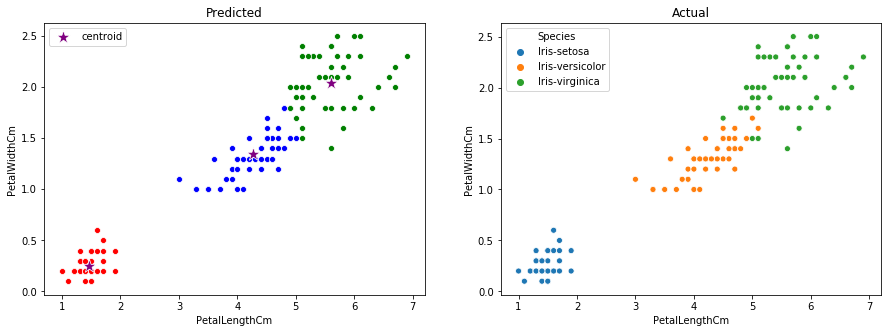

In [124]:
fig,[ax1,ax2] = plt.subplots(1,2)
fig.set_size_inches(15,5)
sns.scatterplot(x ="PetalLengthCm",y="PetalWidthCm",data=df[df.clusters==0],color= "red",ax=ax1)
sns.scatterplot(x ="PetalLengthCm",y="PetalWidthCm",data=df[df.clusters==1],color= "green",ax=ax1)
sns.scatterplot(x ="PetalLengthCm",y="PetalWidthCm",data=df[df.clusters==2],color= "blue",ax=ax1)
sns.scatterplot(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=200,ax=ax1)
sns.scatterplot(x ="PetalLengthCm",y="PetalWidthCm",hue= "Species",data=df,ax=ax2)
ax1.set_title("Predicted")
ax2.set_title("Actual")

### Now We Perform this by applying MinMaxScaler

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
scaler = MinMaxScaler()

scaler.fit(df[["PetalLengthCm"]])
df["New_PetalLength"] = scaler.transform(df[["PetalLengthCm"]])

scaler.fit(df[["PetalWidthCm"]])
df["New_PetalWidth"]  = scaler.transform(df[["PetalWidthCm"]])

In [127]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters,New_PetalLength,New_PetalWidth
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0.067797,0.041667
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0.067797,0.041667
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0.050847,0.041667
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0.084746,0.041667
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0.067797,0.041667


In [129]:
km1 = KMeans(n_clusters=3)
predicted1 = km1.fit_predict(df[["New_PetalLength","New_PetalWidth"]])
predicted1
df["clusters_new"] = predicted1
df = df.reindex(columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'New_PetalLength', 'New_PetalWidth', 'clusters',
       'clusters_new'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,New_PetalLength,New_PetalWidth,clusters,clusters_new
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.067797,0.041667,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.067797,0.041667,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.050847,0.041667,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.084746,0.041667,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.067797,0.041667,0,1


In [80]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'clusters', 'New_PetalLength', 'New_PetalWidth',
       'clusters_new'],
      dtype='object')

Text(0.5, 1.0, 'Actual')

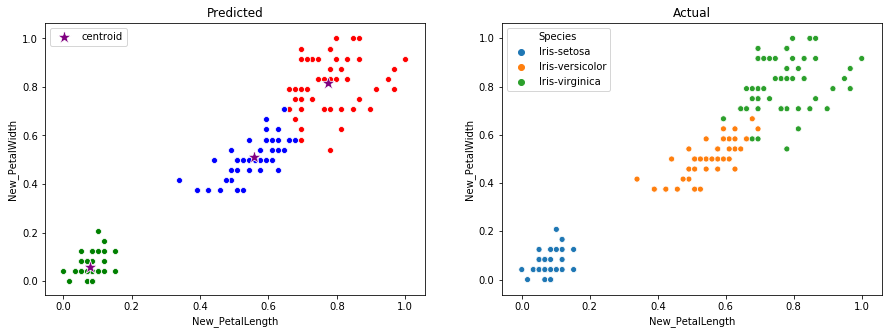

In [77]:
fig,[ax1,ax2] = plt.subplots(1,2)
fig.set_size_inches(15,5)
sns.scatterplot(x ="New_PetalLength",y="New_PetalWidth",data=df[df.clusters==0],color= "red",ax=ax1)
sns.scatterplot(x ="New_PetalLength",y="New_PetalWidth",data=df[df.clusters==1],color= "green",ax=ax1)
sns.scatterplot(x ="New_PetalLength",y="New_PetalWidth",data=df[df.clusters==2],color= "blue",ax=ax1)
sns.scatterplot(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s=200,ax=ax1)
sns.scatterplot(x ="New_PetalLength",y="New_PetalWidth",hue= "Species",data=df,ax=ax2)
ax1.set_title("Predicted")
ax2.set_title("Actual")